In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
features_train = pd.read_csv('features_train.csv')
features_train.shape
classes_train = pd.read_csv('classes_train.csv')
classes_train.shape

(2400, 1)

In [23]:
features_train_new = features_train.copy()
features_train_new['is_bot'] = pd.Series(classes_train['is_bot'], index = features_train_new.index)

features_train_new.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length,is_bot
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,...,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73,0
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,...,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142,0
2,704,3108,454,2400,77,0,0,0,1358,0.518409,...,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90,0
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,...,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51,0
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,...,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106,0


In [24]:
features_train_new.count()

statuses_count                     2400
followers_count                    2400
friends_count                      2400
favourites_count                   2400
listed_count                       2400
is_default_profile                 2400
is_profile_use_background_image    2400
is_verified                        2400
user_age                           2400
tweets_freq                        2400
followers_growth_rate              2400
friends_growth_rate                2400
favourites_growth_rate             2400
listed_growth_rate                 2400
followers_friends_ratio            2400
screen_name_length                 2400
num_digits_in_screen_name          2400
length_of_name                     2400
num_digits_in_name                 2400
description_length                 2400
is_bot                             2400
dtype: int64

<AxesSubplot:>

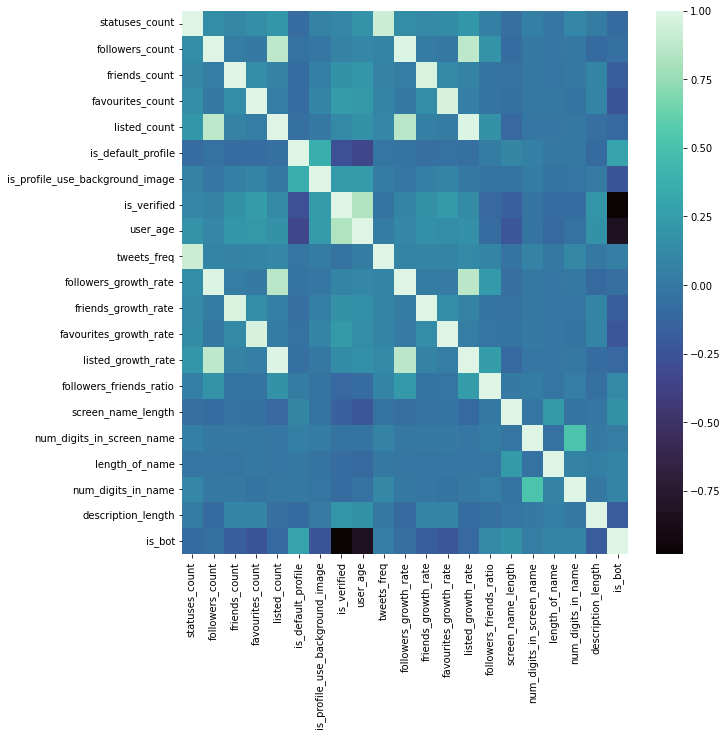

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(features_train_new.corr(), cmap = "mako")

In [40]:
X = features_train_new.drop('is_bot', axis = 1)
Y = features_train_new.is_bot
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

# 1.1 Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры

F-мера average =
binary - результаты только для класса, указанного параметром pos_label
micro - глобально, подсчитывая общее количество истинных срабатываний, ложноотрицательных и ложноположительных результатов
macro - для каждой метки, находит их невзвешенное среднее значение
weighted - для каждой метки, находит их взвешенное среднее значение

In [66]:
import numpy as np
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
F_measure = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }

In [68]:
Log = LogisticRegression()
scaler = StandardScaler()

X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

F_measure['LogisticRegression'] = f1_score(Y_test, Y_Log, average = "weighted")

In [69]:
KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

F_measure['KNeighborsClassifier'] = f1_score(Y_test, Y_KNN, average = "weighted")

In [70]:
DTC = DecisionTreeClassifier()
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)
Y_DTC = model_DTC.predict(X_test)

F_measure['DecisionTreeClassifier'] = f1_score(Y_test, Y_DTC, average = "weighted")

In [71]:
RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

F_measure['RandomForestClassifier'] = f1_score(Y_test, Y_RFC, average = "weighted")

In [72]:
maxim = -1
for i, j in F_measure.items():
    print ('Model:', i, ' F_measure:', j)
    if j > maxim:
        maxim = j
        model_max = i
        
print ('Best model:', model_max, ' F_measure:', maxim)

Model: LogisticRegression  F_measure: 0.9966666666666667
Model: KNeighborsClassifier  F_measure: 0.9798202354201699
Model: DecisionTreeClassifier  F_measure: 0.988295087033787
Model: RandomForestClassifier  F_measure: 0.9983315321915928
Best model: RandomForestClassifier  F_measure: 0.9983315321915928


In [73]:
joblib.dump(model_RFC, 'best_model-1.1.pkl')

['best_model-1.1.pkl']